# Time Series with Pandas

- Working with financial data involves working with data and time index

- Pandas is well suited for datetime-stamped data

- Lets see it in action :

In [1]:
# Usual stuff :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# datatime library 
from datetime import datetime

In [4]:
the_date = datetime(2018,1,1) # January 1st, 2018

In [7]:
the_date

datetime.datetime(2018, 1, 1, 0, 0)

In [8]:
# Add time data 
the_datetime  = datetime(2018,1,1, 15,45,0) # January 1st, 2018

In [9]:
the_datetime

datetime.datetime(2018, 1, 1, 15, 45)

In [9]:
# Attriutes
the_datetime.day, the_datetime.hour

(1, 15)

### Treat Datetime  as Index

- If data is as a time series,the datetime column can be treated as the index

In [10]:
# Create an example datetime list/array
time_ser=[datetime(2018, 1, 1), datetime(2018, 1, 2),  datetime(2018, 2, 1)]
time_ser

[datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2018, 1, 2, 0, 0),
 datetime.datetime(2018, 2, 1, 0, 0)]

In [13]:
# datetime as index
index_ser = pd.DatetimeIndex(time_ser)
pd.DatetimeIndex?

In [14]:
# Attached to some random data
data = np.random.randn(3,3)
print(data)
cols = ['Col1','Col2','Col3']

[[-1.07784435 -1.47066187  0.95929577]
 [ 0.98451741 -0.42743568 -1.72016531]
 [ 1.58475746  1.02503363 -0.97080951]]


In [17]:
pd.DataFrame(data,index_ser)

,0,1,2
2018-01-01,-1.077844,-1.470662,0.959296
2018-01-02,0.984517,-0.427436,-1.720165
2018-02-01,1.584757,1.025034,-0.970810


In [18]:
df=pd.DataFrame(data,index_ser)
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-02-01'], dtype='datetime64[ns]', freq=None)

In [21]:
df.index.max()

Timestamp('2018-02-01 00:00:00')

In [24]:
# See all the attributes
help(df.index)

Help on DatetimeIndex in module pandas.core.indexes.datetimes object:

class DatetimeIndex(pandas.core.indexes.datetimelike.DatelikeOps, pandas.core.indexes.datetimelike.TimelikeOps, pandas.core.indexes.datetimelike.DatetimeIndexOpsMixin, pandas.core.indexes.numeric.Int64Index)
 |  Immutable ndarray of datetime64 data, represented internally as int64, and
 |  which can be boxed to Timestamp objects that are subclasses of datetime and
 |  carry metadata such as frequency information.
 |  
 |  Parameters
 |  ----------
 |  data  : array-like (1-dimensional), optional
 |      Optional datetime-like data to construct index with
 |  copy  : bool
 |      Make a copy of input ndarray
 |  freq : string or pandas offset object, optional
 |      One of pandas date offset strings or corresponding objects
 |  start : starting value, datetime-like, optional
 |      If data is None, start is used as the start point in generating regular
 |      timestamp data.
 |  periods  : int, optional, > 0
 |   

### Time averaging :


In [15]:
# Lets get a sample stock data 

#url : https://www.dropbox.com/s/v3dhbyqn80yxtfc/stock_1.csv?dl=0

df = pd.read_csv('Data/Finance_in_Python/stock_1.csv',index_col='Date',parse_dates=True)

# Other way of doing it : df['Date'] = df['Date'].apply(pd.to_datetime)


In [16]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


### rolling: 

We can get the rolling mean of the data !

In [18]:
df.rolling?

In [24]:
df.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


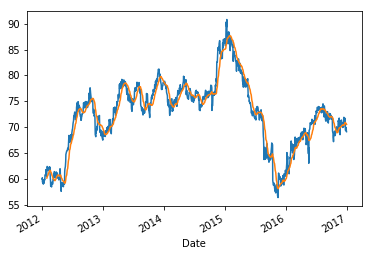

In [31]:
%matplotlib inline
df.Open.plot()
df.Open.rolling(20).mean().plot()

### Challenge: Bollinger Bands

Use what you know so far to plot the Bollinger Bands on the data

More info : http://www.investopedia.com/terms/b/bollingerbands.asp

# Time Resampling

How we can sample time series data? It is very handy dealing with FInancial data !

In [26]:
df.resample?

In [32]:
df.resample(rule='A') # rule: A : Annual, M for monthly, B:business day frequency, C:custom business day frequency 
                      #D: calendar day frequency etc ...

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

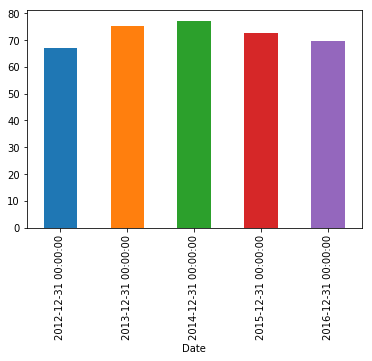

In [28]:
df.resample(rule='A').mean().Open.plot(kind='bar')

# Time Shifting

Good for when you want to shift all your data:

In [47]:
df.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [33]:
df.shift(2).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-06,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-09,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539


### Challenge :

 Try tshift()

# Fetch online data :

### Pandas Datareader

- Geography dependent 

- Can fetch data from multiple places e.g. from 

        - Yahoo! Finance
        - Google Finance
        - Nasdaq



In [35]:
import pandas_datareader.data as DRdata

import datetime

Apple = DRdata.DataReader("APPL", 'google', '2015-01-01','2017-01-01')

DRdata.DataReader?

# Quandl
https://www.quandl.com/tools/python

In [4]:
import quandl
data = quandl.get("EIA/PET_RWTC_D", start_date="2010-01-01", end_date="2012-12-31")

# Other examples : "FRED/GDP" , NSE/OIL.1, WIKI/FB

In [ ]:
mydata.plot(figsize=(10,5))

### Portfolio setup in Python :

In [42]:
type(stock1.index[0])

pandas._libs.tslib.Timestamp

In [2]:
# Lets set up a portfolio :

start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

# Option 1: Directly from Quandl

# Grabbing a bunch of tech stocks for our portfolio
#aapl = quandl.get('WIKI/stock',start_date=start,end_date=end)


#Option 2: From csv files: https://www.dropbox.com/s/22qh8iphrrvs3cq/stocks.zip?dl=0

stock1 = pd.read_csv('Data/Finance_in_Python/stock1.csv',index_col='Date',parse_dates=True)
stock2 = pd.read_csv('Data/Finance_in_Python/stock2.csv',index_col='Date',parse_dates=True)
stock3 = pd.read_csv('Data/Finance_in_Python/stock3.csv',index_col='Date',parse_dates=True)
stock4 = pd.read_csv('Data/Finance_in_Python/stock4.csv',index_col='Date',parse_dates=True)

stock_list=[stock1,stock2,stock3,stock4]

In [3]:
stock1.head()

,Adj. Close
Date,
2012-01-03,53.063218
2012-01-04,53.348386
2012-01-05,53.940658
2012-01-06,54.504543
2012-01-09,54.418089


### Normalized return:

We can quantify the return of the stock w.r.t. first-day data :

In [4]:
for stock_df in stock_list:
    stock_df['NormReturn'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [82]:
stock1.head()

,Adj. Close,NormReturn
Date,,
2012-01-03,53.063218,1.000000
2012-01-04,53.348386,1.005374
2012-01-05,53.940658,1.016536
2012-01-06,54.504543,1.027162
2012-01-09,54.418089,1.025533


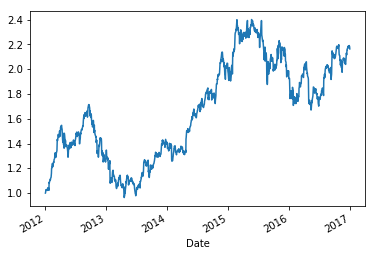

In [83]:
stock1.NormReturn.plot()

### Portfolio Allocation:

We can set up a portfolio out of these four stocks:

* 30% in stock1
* 20% in stock2
* 40% in stock3
* 10% in stock4


### Challenge : 

If I invest $ 1000 in this portfolio, what is the portfolio value over time ?

In [5]:
# We can assume that we are investing on the first day where all the return is normalized to 1.
# We then have the allocation to each stock quantified by variations in the normalized return :

alloc_list=[.3,.2,.4,.1]

for stock,alloc in zip(stock_list,alloc_list):
    stock['Alloced'] = stock['NormReturn']*alloc

In [47]:
# side note:

#zip?
zipped=zip ([1,2],[3,4])
print (zipped) 
print (zipped[1]) 
print (zipped[1][1])

[(1, 3), (2, 4)]
(2, 4)
4


In [86]:
stock1.head()

,Adj. Close,NormReturn,Alloced
Date,,,
2012-01-03,53.063218,1.000000,0.300000
2012-01-04,53.348386,1.005374,0.301612
2012-01-05,53.940658,1.016536,0.304961
2012-01-06,54.504543,1.027162,0.308149
2012-01-09,54.418089,1.025533,0.307660


In [6]:
init_invest=1000

for stock in stock_list:
    stock['Value'] =  stock['Alloced']*init_invest
    
stock1.head()

,Adj. Close,NormReturn,Alloced,Value
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300.000000
2012-01-04,53.348386,1.005374,0.301612,301.612236
2012-01-05,53.940658,1.016536,0.304961,304.960728
2012-01-06,54.504543,1.027162,0.308149,308.148725
2012-01-09,54.418089,1.025533,0.307660,307.659947


#### Lets get our portfolio value :

In [7]:

portfolio= pd.concat([stock1.Value, stock2.Value,stock3.Value, stock4.Value], axis=1)
portfolio.head()

,Value,Value,Value,Value
Date,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000
2012-01-04,301.612236,203.864734,398.368223,99.150980
2012-01-05,304.960728,203.113258,396.478798,99.206837
2012-01-06,308.148725,202.361782,391.926999,101.999665
2012-01-09,307.659947,203.650027,389.887279,99.737474


In [8]:
# The column headers are not good !

portfolio.columns=['stock1','stock2','stock3','stock4']
portfolio.head()

,stock1,stock2,stock3,stock4
Date,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000
2012-01-04,301.612236,203.864734,398.368223,99.150980
2012-01-05,304.960728,203.113258,396.478798,99.206837
2012-01-06,308.148725,202.361782,391.926999,101.999665
2012-01-09,307.659947,203.650027,389.887279,99.737474


In [9]:
portfolio['Total Value']= portfolio.sum(axis=1)
portfolio.head()

,stock1,stock2,stock3,stock4,Total Value
Date,,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000,1000.000000
2012-01-04,301.612236,203.864734,398.368223,99.150980,1002.996174
2012-01-05,304.960728,203.113258,396.478798,99.206837,1003.759620
2012-01-06,308.148725,202.361782,391.926999,101.999665,1004.437171
2012-01-09,307.659947,203.650027,389.887279,99.737474,1000.934727


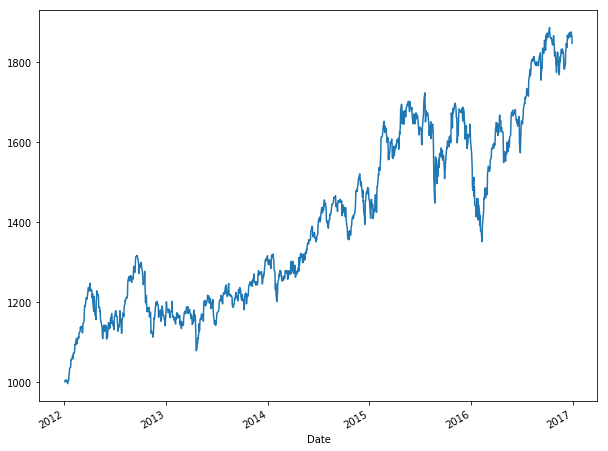

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
portfolio['Total Value'].plot(figsize=(10,8))


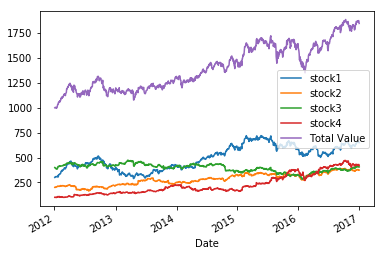

In [92]:
# Lets look at the performance of the individual stocks:

portfolio.plot(kind='line')

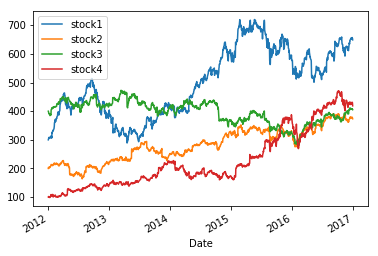

In [93]:
# Lets get rid of the "Total Position" to see the individual stocks better :

portfolio.drop(['Total Value'], axis=1).plot(kind='line')

### Basic portfolio statistics 

In [11]:
# Daily return : percentage of change in the portfolio value, on a daily basis 

portfolio['Daily Return'] = portfolio['Total Value'].pct_change(1)

# Also try :
# portfolio['Daily Return'] = portfolio_val['Total Value'].pct_change(1)
portfolio

Object `pct_change` not found.


,stock1,stock2,stock3,stock4,Total Value,Daily Return
Date,,,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000,1000.000000,NaN
2012-01-04,301.612236,203.864734,398.368223,99.150980,1002.996174,0.002996
2012-01-05,304.960728,203.113258,396.478798,99.206837,1003.759620,0.000761
2012-01-06,308.148725,202.361782,391.926999,101.999665,1004.437171,0.000675
2012-01-09,307.659947,203.650027,389.887279,99.737474,1000.934727,-0.003487
2012-01-10,308.761520,202.147075,389.286098,100.173155,1000.367848,-0.000566
2012-01-11,308.258152,204.723564,391.454643,99.927386,1004.363746,0.003994
2012-01-12,307.411911,205.582394,387.654321,98.268447,998.917072,-0.005423
2012-01-13,306.259271,204.616210,384.669887,99.659275,995.204644,-0.003716


In [98]:
# Cumulative return : percentage of return in the time period : [value (end)/ value (beginning) ] -1 in %

100 * ( (portfolio['Total Value'][-1]/portfolio['Total Value'][0]) -1)

# Our portfolio value has gone up by ~ %84 in this period ... !

84.742851816654621

In [99]:
# Average daily return :
portfolio['Daily Return'].mean()

0.0005442330716215314

In [101]:
# Spread of daily return : standrad deviation of the daily return distribution

portfolio['Daily Return'].std()

0.010568287769162557

#### We can then imagine that the daily return has a roughly normal distribution with mean of 0.0005 and std of 0.01. Lets check that :

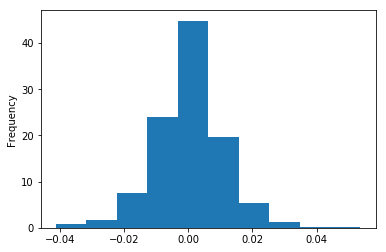

In [130]:
portfolio['Daily Return'].plot(kind='hist',normed=1)

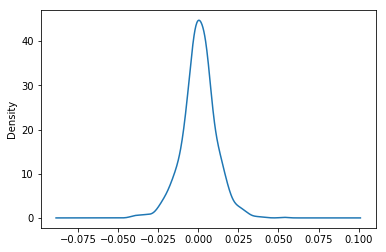

In [103]:
portfolio['Daily Return'].plot(kind='kde')  
# kde : kernel density plot 
# Wikipedia: In statistics, KDE is a non-parametric way of estimting the PDF of a random variable. 
# A way for smoothing noisy data 

### Sharpe Ratio


Sharpe ratio = [Mean (portfolio return) − Riskfree rate]/std(portf. return)

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

For RF-rate, one can use LIBOR rates : (http://www.investopedia.com/terms/l/libor.asp).


In [13]:
# Assuming RF-rate ~ 0 :
SR = portfolio['Daily Return'].mean()/portfolio['Daily Return'].std()
SR

0.05149680662647749

### Stocks' covariances

In [14]:
# Lets get the stocks into one df
stocks = pd.concat([stock1.NormReturn,stock2.NormReturn,stock3.NormReturn,stock4.NormReturn],axis=1)
stocks.columns = ['stock1','stock2','stock3','stock4']

In [15]:
stocks.head()

,stock1,stock2,stock3,stock4
Date,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,1.019324,0.995921,0.991510
2012-01-05,1.016536,1.015566,0.991197,0.992068
2012-01-06,1.027162,1.011809,0.979817,1.019997
2012-01-09,1.025533,1.018250,0.974718,0.997375


#### BTW, shift and pct_change can work the same :

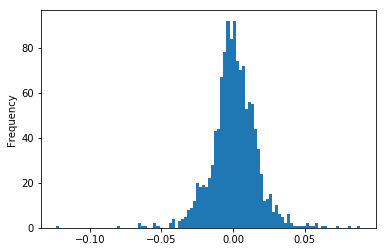

In [33]:
stock1['NormReturn'].pct_change(1).plot(kind='hist', bins=100)

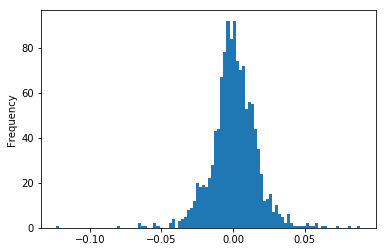

In [32]:
(stock1.NormReturn/stock1.NormReturn.shift(1)-1).plot(kind='hist', bins=100)

In [282]:
# Pearson correlation function  
stocks.pct_change(1).corr()

,stock1,stock2,stock3,stock4
stock1,1.000000,0.301990,0.297498,0.235487
stock2,0.301990,1.000000,0.424672,0.284470
stock3,0.297498,0.424672,1.000000,0.258492
stock4,0.235487,0.284470,0.258492,1.000000


### Log Returns

- They are almost the same in most cases.

- Log returns are more convenient to work with, for example when it comes to normalizing these Time Series data.




In [118]:
# Now to get Log return :
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,stock1,stock2,stock3,stock4
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


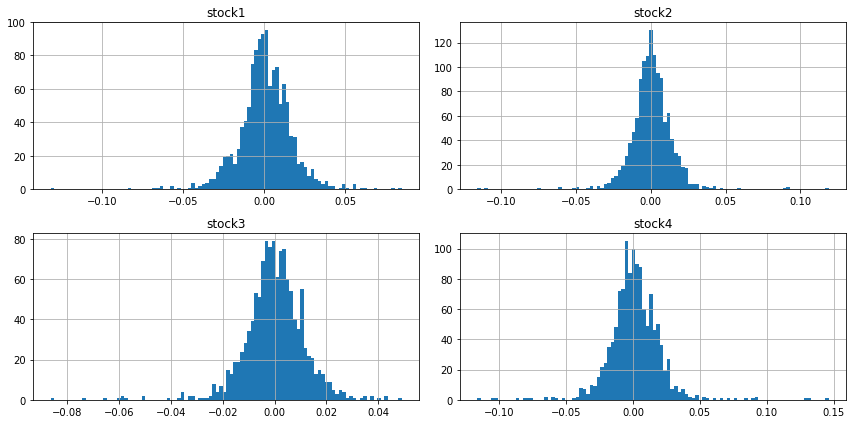

In [119]:
log_ret.hist(bins=100,figsize=(12,6))
plt.tight_layout()

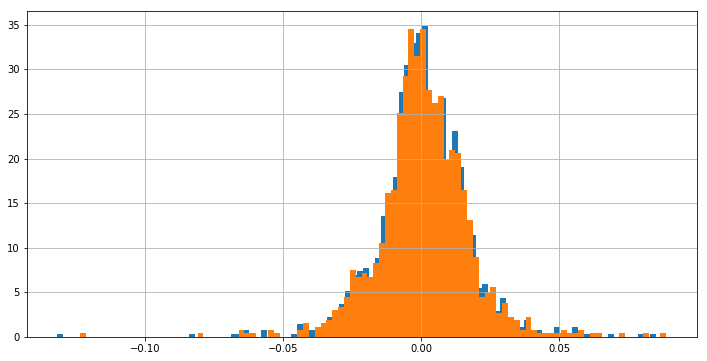

In [141]:
# The two distributions are almost the same:
np.log(stock1.NormReturn/stock1.NormReturn.shift(1)).hist(bins=100,figsize=(12,6),normed=1)
(stock1.NormReturn/stock1.shift(1).NormReturn -1).hist(bins=100,normed=1)


#### The mean and std of the two dostributions are very close :
#### (the means are well within 1-sigma of eachother)

In [37]:
print(np.log(stock1.NormReturn/stock1.NormReturn.shift(1)).mean(),np.log(stock1.NormReturn/stock1.NormReturn.shift(1)).std())
print((stock1.NormReturn/stock1.shift(1).NormReturn -1).mean(),(stock1.NormReturn/stock1.shift(1).NormReturn -1).std())

(0.000614299232405937, 0.016466159821667298)
(0.0007497682278136232, 0.016434317899305224)


In [144]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stock1,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
stock2,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
stock3,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
stock4,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [145]:
log_ret.mean() * 252 # 252: # of business days 

stock1    0.154803
stock2    0.125291
stock3    0.002788
stock4    0.287153
dtype: float64

In [146]:
# Compute pairwise covariance of columns
log_ret.cov()

,stock1,stock2,stock3,stock4
stock1,0.000271,0.000071,0.000057,0.000075
stock2,0.000071,0.000204,0.000072,0.000079
stock3,0.000057,0.000072,0.000140,0.000059
stock4,0.000075,0.000079,0.000059,0.000375


In [147]:
log_ret.cov()*252 # multiply by days

,stock1,stock2,stock3,stock4
stock1,0.068326,0.017854,0.014464,0.018986
stock2,0.017854,0.051381,0.018029,0.019956
stock3,0.014464,0.018029,0.035203,0.014939
stock4,0.018986,0.019956,0.014939,0.094470


## Portfolio Optimization :

### 1- Random portfolio allocation and Monte Carlo simulation:

In [158]:
# Create Random Weights, normalized
weights = np.array(np.random.random(4))
weights =weights/np.sum(weights)

# Calculate the return and variance (volatility)
exp_ret = np.sum(log_ret.mean() * weights) *252
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

# Calculate Sharpe Ratio
SR = exp_ret/exp_vol

SR

0.95062868890882779

#### Monte Carlo Simulation: Repeat the procedure above for many times 

In [160]:
num_ports = 15000

weights_arr = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    weights_arr[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

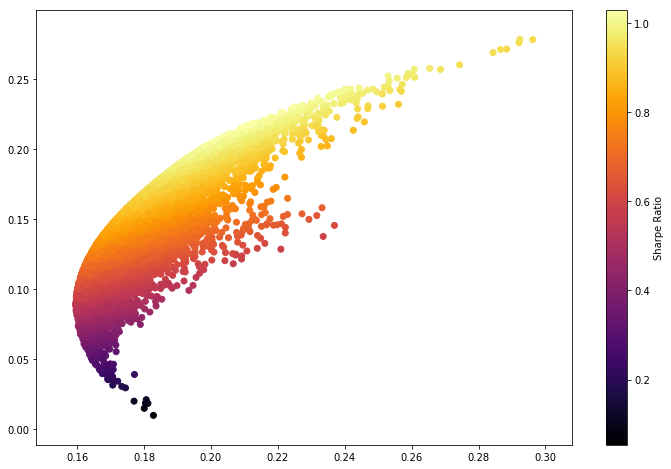

In [171]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='inferno')
plt.colorbar(label='Sharpe Ratio')
# plt.xlabel('Volatility')
# plt.ylabel('Return')

# # Add red dot for max SR
# plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

### Challenge : Caluclate the max Sharpe ratio and show it on the plot 

(0.21495668934940643, 0.20887471173430922, 1.0291178264932022)


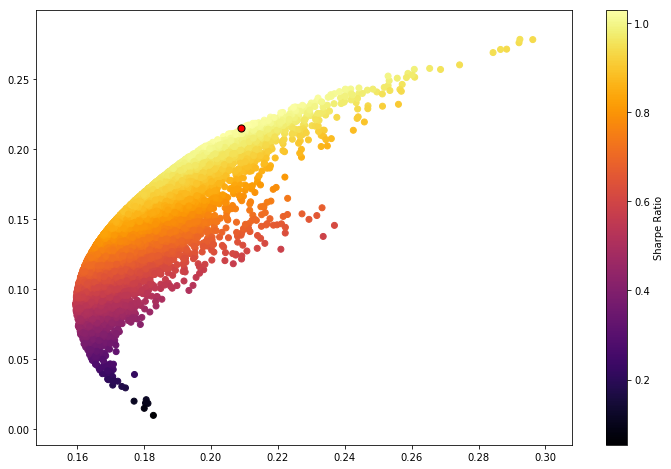

In [214]:
sharpe_arr.max()
sharpe_arr.argmax()
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=vol_arr[sharpe_arr.argmax()]

print(max_sr_ret,max_sr_vol,sharpe_arr.max())

plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='inferno')
plt.colorbar(label='Sharpe Ratio')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')


### 2- Mathematical minimization :

We can define a function based on the SR o that minimizing it gives us the best SR. 

The goal is to define the portfolio weights to get the best SR:

In [185]:
def get_SR(weights):

    weights = np.array(weights)
    Ave_return = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    SR = Ave_return/vol # Assuming the RF-rate is 0
    return np.array([Ave_return,vol,SR])

In [186]:
def min_SR(weights):
    return  get_SR(weights)[2] * -1

In [194]:
min_SR([1,0,0,0])

-0.59222660916432535

In [195]:
min_SR([0,1,0,0])

-0.55273738279339879

In [40]:
from scipy.optimize import minimize
minimize?

In [177]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized. Must be in the form
        ``f(x, *args)``. The optimizing argument, ``x``, is a 1-D array
        of points, and ``args`` is a tuple of any additional fixed parameters
        needed 

We require some arguments for the minimize function:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

X0 ?

bound ?

constraints?


In [178]:
# X0:
weights_0=[0.25,0.25,0.25,0.25]

In [196]:
minimize(min_SR, weights_0)

      fun: -1.1194046846961507
 hess_inv: array([[ 1.24439887, -0.19542412, -0.0913705 , -0.04017646],
       [-0.19542412,  1.81590145, -0.49691706, -0.1524599 ],
       [-0.0913705 , -0.49691706,  1.67290155,  0.11541341],
       [-0.04017646, -0.1524599 ,  0.11541341,  0.93361828]])
      jac: array([  8.94069672e-08,  -2.83122063e-07,  -7.89761543e-07,
        -6.10947609e-07])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 0.40101301,  0.43366553, -0.66110951,  0.69293564])

In [197]:
Min_Results=minimize(min_SR, weights_0)

In [198]:
Min_Results?

In [199]:
Min_Results.x

array([ 0.40101301,  0.43366553, -0.66110951,  0.69293564])

In [200]:
Min_Results.x.sum()

0.86650468181053053

#### Seems like our portfolio has some problems:
    - sum(weights) /=1 !
    - one of the weights is negative !
    
-__constraints:__ From help :

constraints : dict or sequence of dict, optional
        Constraints definition (only for COBYLA and SLSQP).
        Each constraint is defined in a dictionary with fields:
    
            type : str
                Constraint type: 'eq' for equality, 'ineq' for inequality.
            fun : callable
                The function defining the constraint.
            jac : callable, optional
                The Jacobian of `fun` (only for SLSQP).
            args : sequence, optional
                Extra arguments to be passed to the function and Jacobian.
    
        Equality constraint means that the constraint function result is to
        be zero whereas inequality means that it is to be non-negative.
        Note that COBYLA only supports inequality constraints.
        
-__bounds:__

bounds : sequence, optional
        Bounds for variables (only for L-BFGS-B, TNC and SLSQP).
        ``(min, max)`` pairs for each element in ``x``, defining
        the bounds on that parameter. Use None for one of ``min`` or
        ``max`` when there is no bound in that direction.


In [207]:
def weight_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

cons=({'type':'eq','fun': weight_sum})

In [205]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [210]:
# Try again :
Min_Results=minimize(min_SR,weights_0,bounds=bounds,constraints=cons)
Min_Results.x

array([  2.66289764e-01,   2.04189830e-01,   2.86568187e-17,
         5.29520406e-01])

In [211]:
Min_Results.x.sum()

1.0

In [212]:
get_SR(Min_Results.x)

array([ 0.21885915,  0.21233683,  1.03071687])

#### Not quit what we got before !

In [215]:
# Try another method:
Min_Results=minimize(min_SR,weights_0,method='SLSQP',bounds=bounds,constraints=cons)
Min_Results.x

array([  2.66289764e-01,   2.04189830e-01,   2.86568187e-17,
         5.29520406e-01])

In [216]:
get_SR(Min_Results.x)

array([ 0.21885915,  0.21233683,  1.03071687])

### Efficient Frontier: 

set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 

#### We can draw a line for efficient frontier :


In [278]:
front = np.linspace(0.15,0.3,50) # only for the plotted return range 
front

array([ 0.15      ,  0.15306122,  0.15612245,  0.15918367,  0.1622449 ,
        0.16530612,  0.16836735,  0.17142857,  0.1744898 ,  0.17755102,
        0.18061224,  0.18367347,  0.18673469,  0.18979592,  0.19285714,
        0.19591837,  0.19897959,  0.20204082,  0.20510204,  0.20816327,
        0.21122449,  0.21428571,  0.21734694,  0.22040816,  0.22346939,
        0.22653061,  0.22959184,  0.23265306,  0.23571429,  0.23877551,
        0.24183673,  0.24489796,  0.24795918,  0.25102041,  0.25408163,
        0.25714286,  0.26020408,  0.26326531,  0.26632653,  0.26938776,
        0.27244898,  0.2755102 ,  0.27857143,  0.28163265,  0.28469388,
        0.2877551 ,  0.29081633,  0.29387755,  0.29693878,  0.3       ])

In [279]:
def max_ret(weights):
    return  get_SR(weights)[0]*(-1)

In [280]:
front_ret = []

for vol in front:
    conds = ({'type':'eq','fun': weight_sum},
            {'type':'eq','fun': lambda w: get_SR(w)[1] - vol})
    
    result = minimize(max_ret,weights_0,method='SLSQP',bounds=bounds,constraints=conds)
    
    front_ret.append(result['fun']*(-1))

(0.21495668934940643, 0.20887471173430922, 1.0291178264932022)


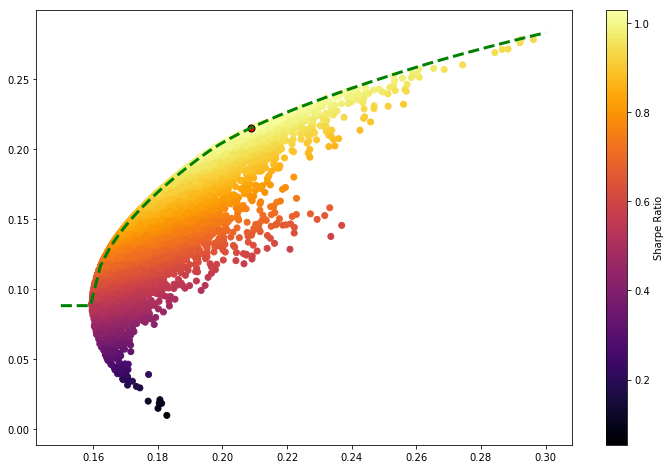

In [281]:
sharpe_arr.max()
sharpe_arr.argmax()
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=vol_arr[sharpe_arr.argmax()]

print(max_sr_ret,max_sr_vol,sharpe_arr.max())

plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='inferno')
plt.colorbar(label='Sharpe Ratio')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

plt.plot(front,front_ret,'g--',linewidth=3)

### Why is the line stopped at 0.16 ?

### Challenge: 

Draw the EF minimizing volatility instead !

In [233]:
front = np.linspace(0.,0.3,50) # only for the plotted return range 
front

array([ 0.        ,  0.00612245,  0.0122449 ,  0.01836735,  0.0244898 ,
        0.03061224,  0.03673469,  0.04285714,  0.04897959,  0.05510204,
        0.06122449,  0.06734694,  0.07346939,  0.07959184,  0.08571429,
        0.09183673,  0.09795918,  0.10408163,  0.11020408,  0.11632653,
        0.12244898,  0.12857143,  0.13469388,  0.14081633,  0.14693878,
        0.15306122,  0.15918367,  0.16530612,  0.17142857,  0.17755102,
        0.18367347,  0.18979592,  0.19591837,  0.20204082,  0.20816327,
        0.21428571,  0.22040816,  0.22653061,  0.23265306,  0.23877551,
        0.24489796,  0.25102041,  0.25714286,  0.26326531,  0.26938776,
        0.2755102 ,  0.28163265,  0.2877551 ,  0.29387755,  0.3       ])

In [242]:
def min_vol(weights):
    return  get_SR(weights)[1]

In [247]:
front_vol = []

for ret in front:
    conds = ({'type':'eq','fun': weight_sum},
            {'type':'eq','fun': lambda w: get_SR(w)[0] - ret})
    
    result = minimize(min_vol,weights_0,method='SLSQP',bounds=bounds,constraints=conds)
    
    front_vol.append(result['fun'])

In [248]:
front_vol

[0.1876254669451035,
 0.18520915998171025,
 0.18105758435461822,
 0.17727432539401233,
 0.17388348003906226,
 0.1709081950038688,
 0.16837066979813614,
 0.16629093562535507,
 0.1646257849120823,
 0.16319953682951144,
 0.16200508102560326,
 0.16104757497167718,
 0.16033126410276655,
 0.1598593904715835,
 0.15963412198752858,
 0.15965650243420443,
 0.1599264278462294,
 0.16044264887850704,
 0.16120279936658422,
 0.162203449781218,
 0.16344018287757564,
 0.1649080540744643,
 0.16660012384161105,
 0.16851112079581274,
 0.17063092782766545,
 0.17295475017408266,
 0.17547260141112037,
 0.17817733568922745,
 0.1810602793537486,
 0.18411308515816194,
 0.18732752004516293,
 0.19069491577055467,
 0.19421015916745835,
 0.19818436878509196,
 0.20281281702080883,
 0.2080517842589531,
 0.21385640622415847,
 0.22018195091107373,
 0.22698490298123275,
 0.2342238639705523,
 0.24185894074365846,
 0.24985460170283225,
 0.2581770869166417,
 0.26699790915102656,
 0.2765037602698161,
 0.28662695909973185,
 

(0.21495668934940643, 0.20887471173430922, 1.0291178264932022)


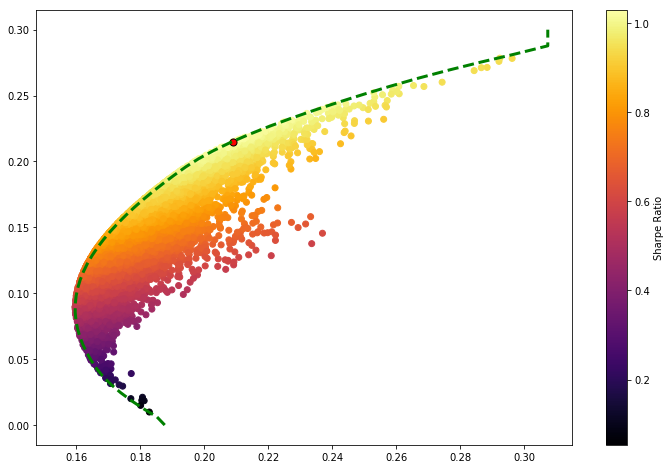

In [250]:
sharpe_arr.max()
sharpe_arr.argmax()
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=vol_arr[sharpe_arr.argmax()]

print(max_sr_ret,max_sr_vol,sharpe_arr.max())

plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='inferno')
plt.colorbar(label='Sharpe Ratio')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

plt.plot(front_vol,front,'g--',linewidth=3)